In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [6]:
data = Data = pd.read_csv('final_packet_test_1.csv', delimiter = ',', encoding='latin-1', header=0)
data.head()

,No.,Time,Source,Destination,Protocol,Length,Transmission Control Protocol,Frame,Ethernet,Hypertext Transfer Protocol,Info
0,1,0.000000,172.217.12.170,192.168.8.219,TLSv1.2,107,â\234\223,â\234\223,â\234\223,NaN,Application Data
1,2,0.000108,192.168.8.219,172.217.12.170,TCP,66,â\234\223,â\234\223,â\234\223,NaN,55530 > 443 [ACK] Seq=1 Ack=34 Win=2047 Len=...
2,3,0.511880,77.234.46.106,192.168.8.219,HTTP,254,â\234\223,â\234\223,â\234\223,â\234\223,HTTP/1.1 200 OK
3,4,0.512007,192.168.8.219,77.234.46.106,TCP,66,â\234\223,â\234\223,â\234\223,NaN,55557 > 80 [ACK] Seq=1 Ack=181 Win=2045 Len=...
4,5,0.517461,192.168.8.219,77.234.46.106,HTTP,320,â\234\223,â\234\223,â\234\223,â\234\223,GET /R/A1MKIDdENTAzMjMwRTMxQTQ5MEJBNUQ2QTcyNTR...


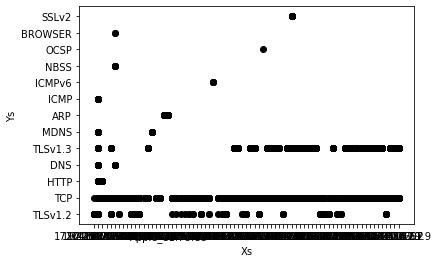

In [8]:
X = data[["Time","Length"]]
#Visualise data points
plt.scatter(X["Length"],X["Time"],c='black')
plt.xlabel('Xs')
plt.ylabel('Ys')
plt.show()

In [23]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=300

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Length"],X["Time"],c='black')
plt.scatter(Centroids["Length"],Centroids["Time"],c='red')
plt.xlabel('Xs')
plt.ylabel('Ys')
plt.show()

KeyError: 'Length'

In [19]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c ["Source"]-row_d ["Protocol"])**2
            d2=(row_c["Protocol"]-row_d["Protocol"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Source","Protocol"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Protocol'] - Centroids['Protocol']).sum() + (Centroids_new['Source'] - Centroids['Source']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Source","Protocol"]]

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [17]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Source"],data["Protocol"],c=color[k])
plt.scatter(Centroids["Source"],Centroids["Protocol"],c='red')
plt.xlabel('Xs')
plt.ylabel('Ys')
plt.show()

KeyError: 'Cluster'